## How to deal imbalanced Dataset
If you Remeber in one of my class i was talking about imbalanced dataset . So what is this imbalanced dataset . SO when it can occur ..

So lets take one example if i talk about defaulter EMI .or loan Defaulter . if you are take any loan in a bank so there are very cases where people will get deafaulter . almost all of the customer payback of there loan very few customer dont pay back due to various reason . Where they will default they not pay back on time or they may run away .

Like Hacking - The Back account is hacked credit card are stolen .

Very less probablity to get this of probelem.

If i want to build a model to predict a person or customer is going to be defaulter or not .
So if my model wants to predict if the person is a defaulter . Suppose if he is going to a deafaulter. So my model needs to understand situation about those customer who all are defaulted in a past . So we all know our model is learn from past data but do we have sufficient defaulter data .

Lets take example - There are 100 people takes loan and 95 people pay on time and 5 will be a defaulter .

and i also give 100 people data to the model my model most of the time learn about 95 people (The customer who are paying) Very less chance it get understand to 5 customers because it has very less population.

## Q - So , What is the problem here ?
Ans - The problem is if my model is learning so much about 95 peoples data . whenever it predicts it tend to predict always not defaulter . it was learn so much about noon defaulter data .

## Q - So Now i want my model to learn about this defaulter also?
Ans- So in this situation our dataset is imbalanced

## Q - How to deal imbalanced Dataset.


In [9]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')


In [10]:
#You can imbalance the diabetes file and change most of 1 to 0 and make it imbalance 

data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes_up_down.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


In [11]:
#Counter module to count each class 
from collections import Counter
Counter(data['Outcome'])

Counter({0: 720, 1: 48})

So , Zero is having majority and 1 is having minority.

So when i build a model my model is learn so much about 0 because 0 have majority.

So , What we need to do in this case .

SO, Thats where two concept comes in a picture

1 - Over Sampling

2 - Under Sampling

## Over Smpling/Up Sampling
1 is -> Eihter we need to increase 1 so it can match with to 720 i can increase the 1 -> 48 class . So this is basically over sampling . increasing the minority class . 1 is a minority class 1 is a minority class because they have less . you have increase the class means you are going to manufacture records so it can match to 0->720 this number that is called over sampling and up sampling.

## Under Sampling / Down Sampling
In other situation i can decrease . cut down this untill when 0 and 1 is going to match.

So , Basically i am removing some sample .

So that is called under sampling or Down Sampling

## Q - So i have two option . When to use which optionand How they work

In [12]:
x=data.drop("Outcome",axis=1)
y=data.Outcome

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=41)
Counter(y_train)

Counter({0: 181, 1: 11})

## Over Sampling using SMOTE (Synthetic Minority OverSampling Technique)
This technique can be used when you have small data set.

This used the euclidion Distance method and find the closest data points to the minority calss and create new minority data point

## When to usr this ?
Ans - When you have small dataset . So you cannot afford to remove existing sample . so it is better to increase . it is better to oversample.

## How it is going to increase the data use SMOTE function.

So , Now i need to increase red to match with blue at least close to blue so , what it does . i need to mention how many records i wanted to generate i have to tell them we will show you . How to mention this option . Usually 70% to 80% we mention . i will show you . Say based on how many records we wanted to generate so what it does it will find some nearest neighbors like . Suppose say i want 85% red . i wanted to generate accodingly it will find the nearest neighbors using euclidean distance (we learn in the KNN) . So, let say closest neighbors at the half can use the less on. They can select How much data you wanted to generate So at the half it will going to manufacture new red points .

In [ ]:
pip install imblearn

In [14]:
#lets import SMOTE

from imblearn.over_sampling import SMOTE

In [15]:
sm=SMOTE()

In [16]:
x_train_ns,y_train_ns=sm.fit_resample(x_train,y_train)

In [17]:
print("The Number of Classes before fit {}".format(Counter(y_train)))
print("The Number of Classed after fit{}".format(Counter(y_train_ns)))

The Number of Classes before fit Counter({0: 181, 1: 11})
The Number of Classed after fitCounter({0: 181, 1: 181})


## DownSampling Using NearMiss
This technique can be used when you have large dataet.

This uses the euclidian distance method and find the colsest data points to the minority class and will elimate the majority data points which are no close to the minority data point.

In [18]:
from imblearn.under_sampling import NearMiss

In [20]:
ds=NearMiss()
x_train_ns,y_train_ns=ds.fit_resample(x_train,y_train)

In [21]:
print("The Number Of Class Before Fit{}".format(Counter(y_train)))
print("The Number of Classes after Fit {}".format(Counter(y_train_ns)))


The Number Of Class Before FitCounter({0: 181, 1: 11})
The Number of Classes after Fit Counter({0: 11, 1: 11})


Generally we dont find this type of a dataset

Usually we can find this type of a dataset Banking , Heart Desease.

## Log Power Transformation.
-> We are look into data transformation we know some transformation . we used standard scaler, That z score and all that is okay.

Q - Let understand other data transformation and when you should use this .
There are situation when you dont want to remove the outlier . you want to keep outliers because may be that real data .

## Lets start with importing necessary Libraries .


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [23]:
#Please check the logistic regression videos for data set information
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')#Reading the data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [25]:
print(data.shape)

(768, 9)


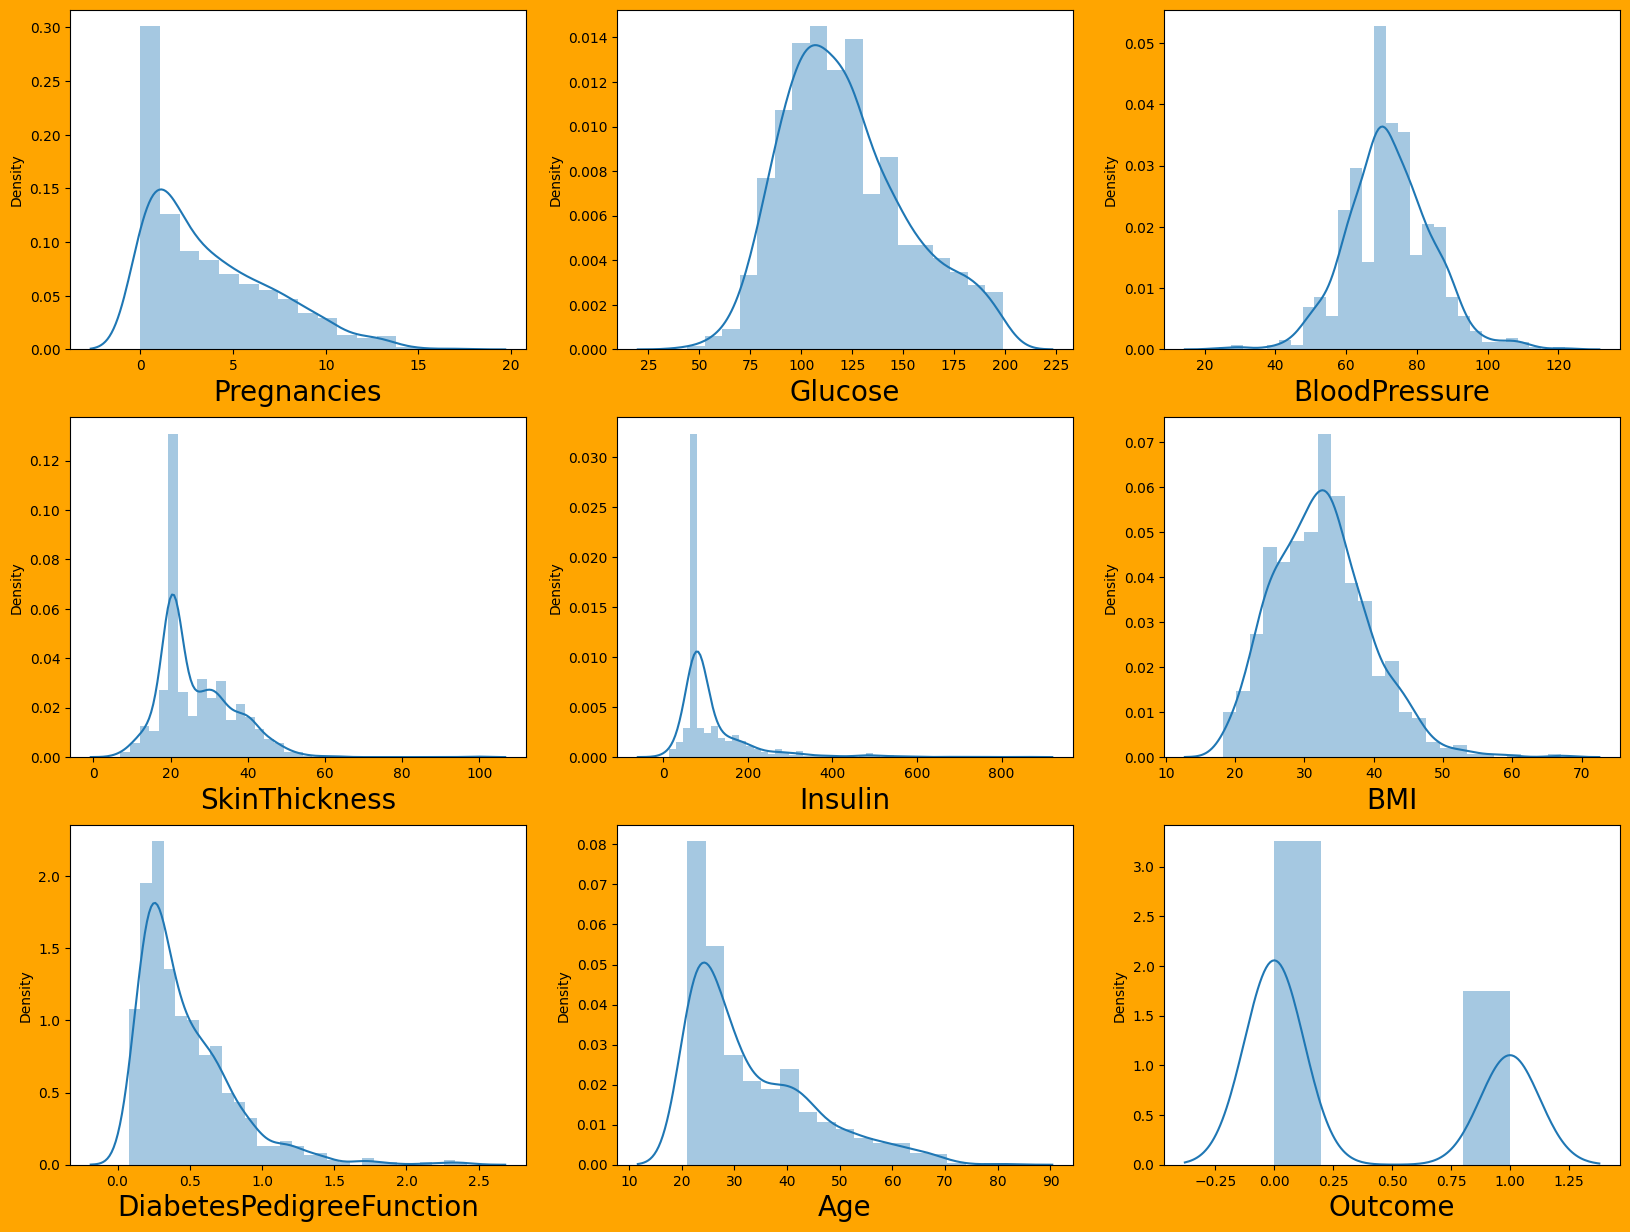

In [26]:
#Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Apply Log Tranformation on continue Variables
It is primarily used to convert a skewed distribution to a normal distribution/less skewed distribution . In this transform we take the log of the values in a column and we use these values as the column instead.

It will try to convert this skewed distribution to a normal distribituion or less skewed.

In [27]:
data['Insulin']=np.log(data['Insulin'])
data['BloodPressure']=np.log(data['BloodPressure'])
data['SkinThickness']=np.log(data['SkinThickness'])
data['SkinThickness']=np.log(data['SkinThickness'])
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])
data['Age']=np.log(data['Age'])

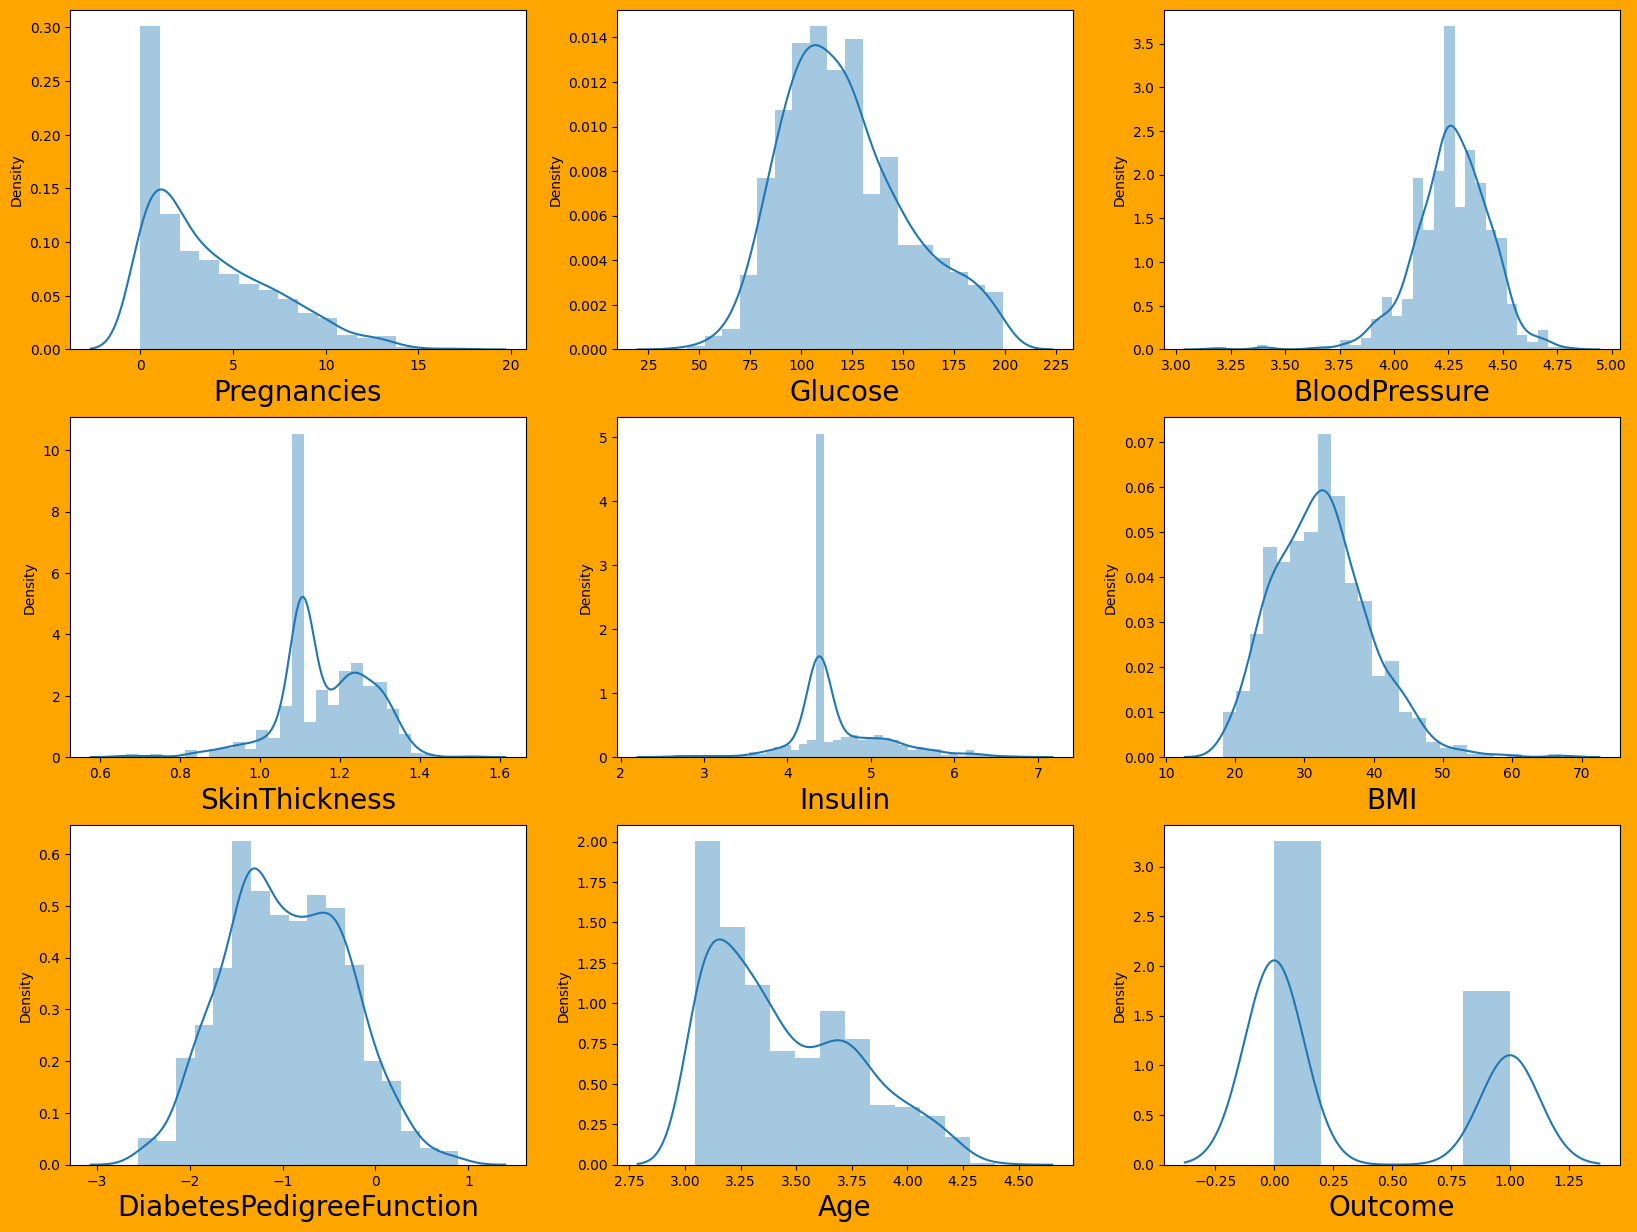

In [28]:
#Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

## Power Tranformer
It is a data transformation technique used to stablize variance , make the data more normal distribution like .

It is another data transformation technique is the power transformer we have two method . basically what this used to stablize the variance means both are same.

Like You have age column -> 2,25,38,79,100

in age of too much variance power tranformer will stablize that.

Make the data more normal distribution like .

In [29]:
#Read files 
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')#Reading the data

#Replacing zero values with meant of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [30]:
features=['BMI','BloodPressure','Insulin','SkinThickness']

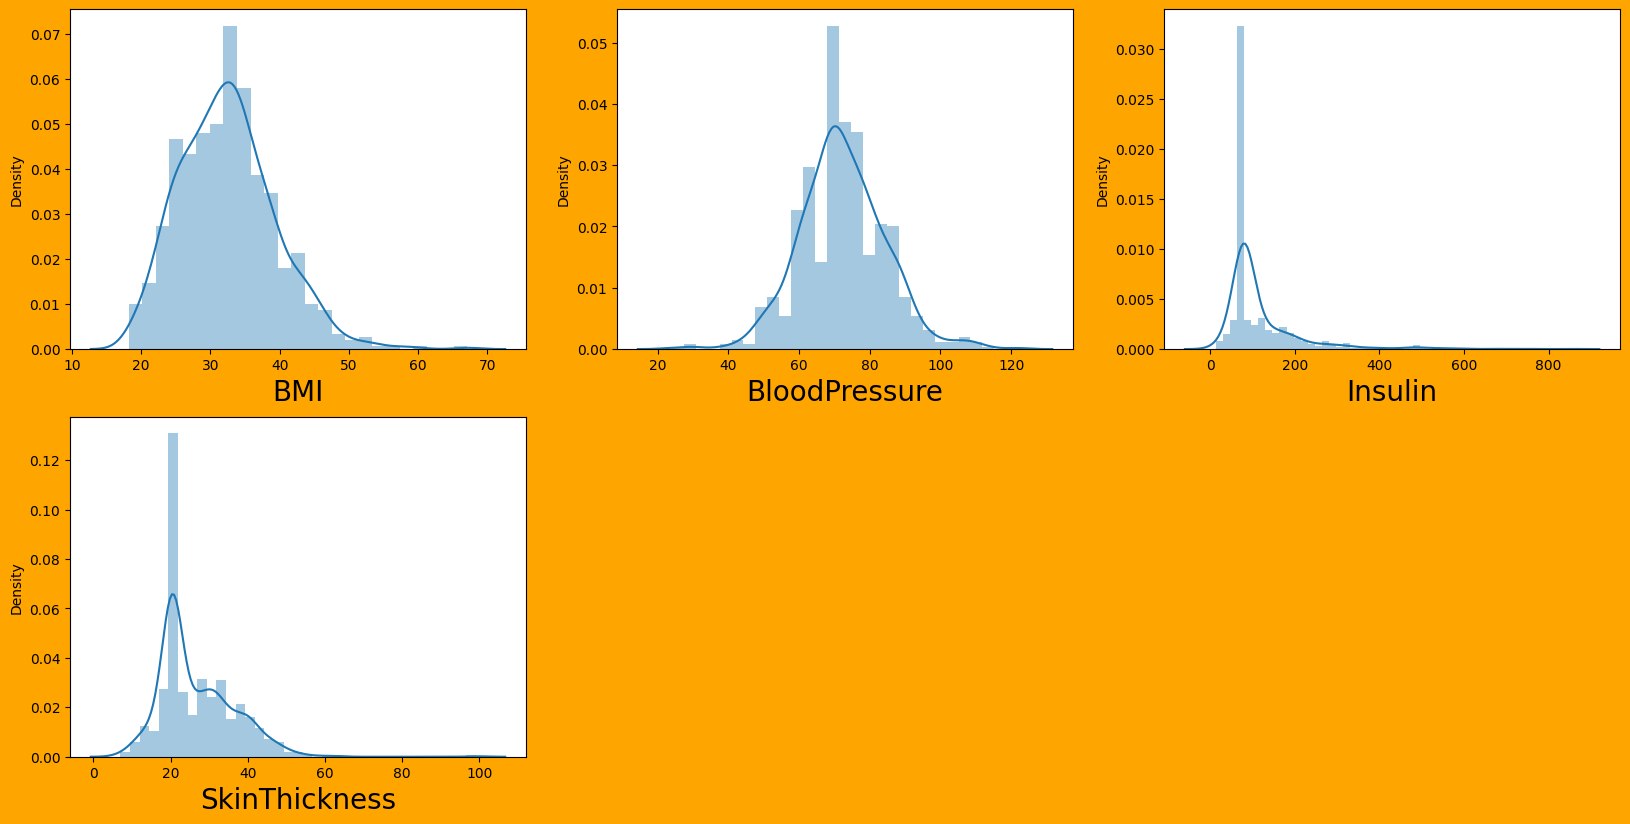

In [31]:
#Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in features:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

## As i say in PowerTransformer we have two technique
## Box-cox works with only positive values (>0)
## Yeo-Johnson Works with both Positive and Negative Values.

In [32]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

'''
Parameters
Method='box-cox' or 'yeo-jhonson'
'''

"\nParameters\nMethod='box-cox' or 'yeo-jhonson'\n"

In [33]:
data[features]=scaler.fit_transform(data[features].values)

In [35]:
data[features]

,BMI,BloodPressure,Insulin,SkinThickness
0,0.261508,-0.009147,-0.350666,0.956846
1,-0.841776,-0.507220,-0.350666,0.415886
2,-1.457249,-0.674630,-0.350666,-0.567991
3,-0.584749,-0.507220,-0.025195,-0.246245
4,1.462877,-2.750268,1.006677,0.956846
...,...,...,...,...
763,0.161140,0.319657,1.117625,1.873163
764,0.697359,-0.174501,-0.350666,0.211217
765,-0.912547,-0.009147,0.305525,-0.246245
766,-0.260838,-1.011681,-0.350666,-0.567991


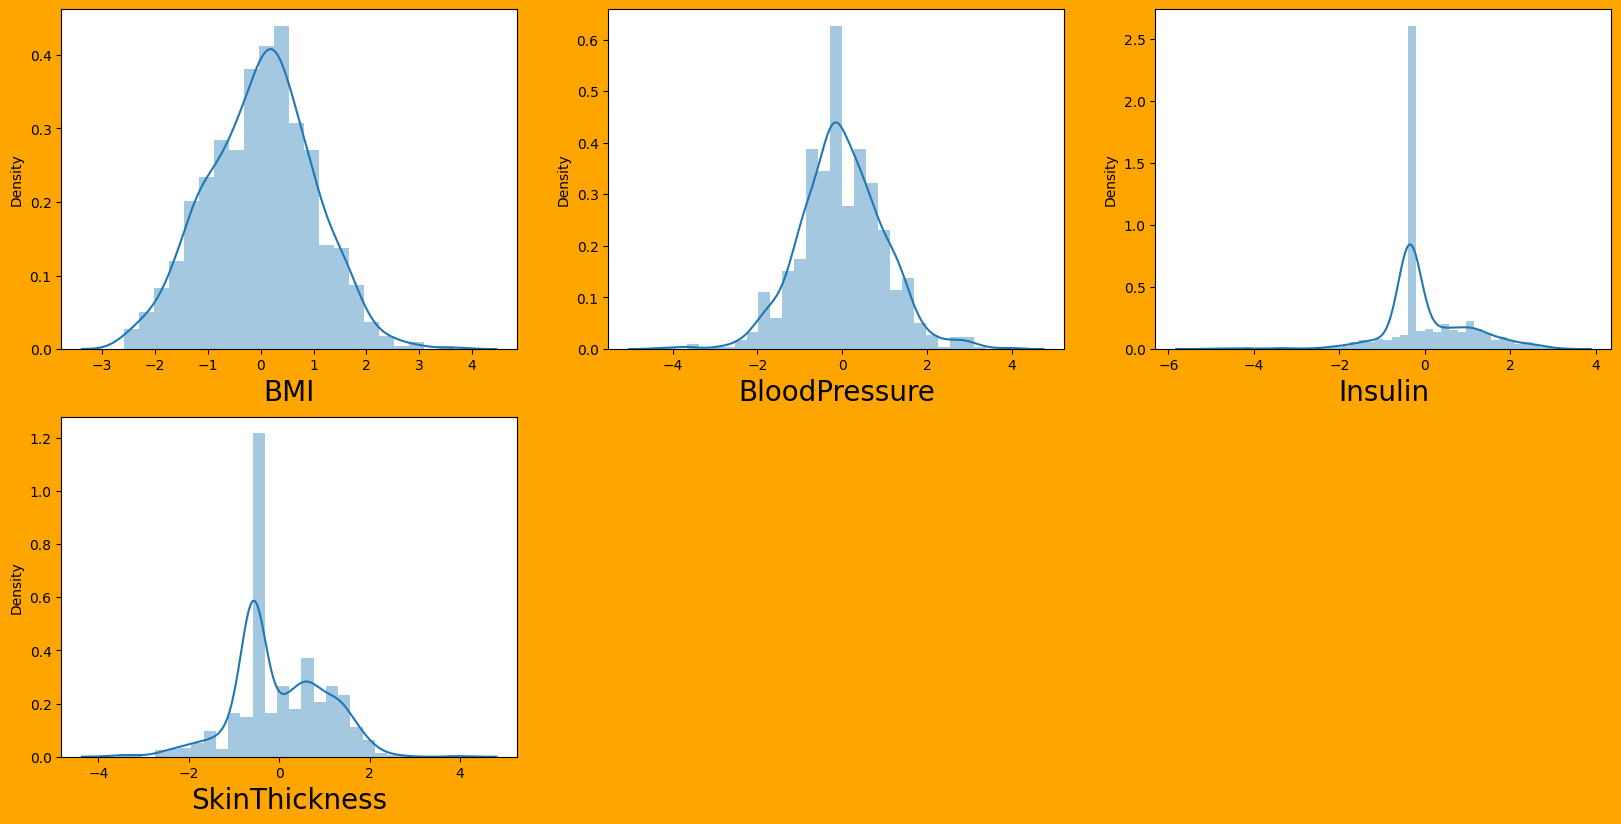

In [36]:
#Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in features:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Post all transformation you can continue with train test split (you dont need to apply Standard Scaler on top of it.